In [1]:
//Universidad Nacional de Colombia
//Física Experimental de Partículas
//Andres Romero Bohada
//Daniel Santiago Rodríguez Ruiz

//Code ttbar

In [2]:
TFile *file = TFile::Open("http://csandova.web.cern.ch/csandova/HEP-Ex-Course/Code/TTbarSel/Data_8TeV.root");
TTree *tree = (TTree*) file->Get("mini");
tree->Print();

******************************************************************************
*Tree    :mini      : 4-vectors + variables required for scaling factors     *
*Entries : 14945674 : Total =      3737586466 bytes  File  Size = 1366006484 *
*        :          : Tree compression factor =   2.74                       *
******************************************************************************
*Br    0 :runNumber : runNumber/I                                            *
*Entries : 14945674 : Total  Size=   59789737 bytes  File Size  =     297928 *
*Baskets :       70 : Basket Size=    1224192 bytes  Compression= 200.68     *
*............................................................................*
*Br    1 :eventNumber : eventNumber/I                                        *
*Entries : 14945674 : Total  Size=   59789885 bytes  File Size  =   44412272 *
*Baskets :       70 : Basket Size=    1224192 bytes  Compression=   1.35     *
*...................................................

In [3]:
Bool_t e_trig;
Bool_t mu_trig;
Bool_t good_vtx;
UInt_t lep_n;
UInt_t jet_n;
Float_t MET;
Float_t MET_phi;

Float_t lep_pt[10];  
Float_t lep_eta[10];  
Float_t lep_phi[10];  
Float_t lep_E[10];  
Int_t lep_type[10];  
Float_t lep_ptcone30[10];
Float_t lep_etcone20[10];

Float_t jet_pt[10];  
Float_t jet_eta[10];
Float_t jet_MV1[10];
Float_t jet_jvf[10];


tree->SetBranchAddress("trigE", &e_trig);
tree->SetBranchAddress("trigM", &mu_trig);
tree->SetBranchAddress("hasGoodVertex", &good_vtx);
tree->SetBranchAddress("lep_n", &lep_n);
tree->SetBranchAddress("jet_n", &jet_n);
tree->SetBranchAddress("met_et", &MET);
tree->SetBranchAddress("met_phi", &MET_phi);
                       

tree->SetBranchAddress("lep_pt", &lep_pt);
tree->SetBranchAddress("lep_eta", &lep_eta);
tree->SetBranchAddress("lep_phi", &lep_phi);
tree->SetBranchAddress("lep_E", &lep_E);
tree->SetBranchAddress("lep_type", &lep_type);
tree->SetBranchAddress("lep_ptcone30", &lep_ptcone30);
tree->SetBranchAddress("lep_etcone20", &lep_etcone20);

tree->SetBranchAddress("jet_pt", &jet_pt);
tree->SetBranchAddress("jet_eta", &jet_eta);
tree->SetBranchAddress("jet_MV1", &jet_MV1);
tree->SetBranchAddress("jet_jvf", &jet_jvf);

In [4]:
TCanvas *canvas = new TCanvas("Canvas","",800,600);
TH1F *cutflow = new TH1F("Cutflow","Cutflow; Cut; Events",100,0,10);
TH1F *hist_njets = new TH1F("Number of jets","njets; Jet multiplicity; Events",100,0,20);
TH1F *hist_jet_pt = new TH1F("Number of jets","jet_pt; Jet pt; Events",100,25000,100000);
TH1F *hist_jet_eta = new TH1F("Number of jets","jet_eta; Jet eta; Events",100,-2.5,2.5);
TH1F *hist_jet_MV1 = new TH1F("Number of jets","jet_MV1; Jet MV1; Events",100,-2,2);
TH1F *hist_jet_jvf = new TH1F("Number of jets","jet_jvf; Jet jvf; Events",100,-2,2);
TH1F *hist_lep_pt = new TH1F("Number of lep_pt","lep_pt; lep_pt; Events",100,20000,200000);
TH1F *hist_TrackIsolation = new TH1F("Number of TrackIsolation","TrackIsolation; TrackIsolation; Events",100,-2,2);
TH1F *hist_CalorimeterIsolation = new TH1F("Number of CalorimeterIsolation","CalorimeterIsolation; CalorimeterIsolation; Events",100,-2,2);
TH1F *hist_lep_eta = new TH1F("Number of lep_eta","lep_eta; lep_eta; Events",100,-2.5,2.5);
TH1F *hist_n_bjets = new TH1F("Number of n_bjets","n_bjets; n_bjets; Events",100,0,10);
TH1F *hist_MET = new TH1F("Number of MET","MET; MET; Events",100,30000,200000);
TH1F *hist_mTW = new TH1F("Number of MET","mTW; mTW; Events",100,30000,200000);



Warning in <TDavixFile::Append>: Replacing existing TH1: Number of jets (Potential memory leak).
Warning in <TDavixFile::Append>: Replacing existing TH1: Number of jets (Potential memory leak).
Warning in <TDavixFile::Append>: Replacing existing TH1: Number of jets (Potential memory leak).
Warning in <TDavixFile::Append>: Replacing existing TH1: Number of jets (Potential memory leak).
Warning in <TDavixFile::Append>: Replacing existing TH1: Number of MET (Potential memory leak).


In [5]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

int cut1 = 0;
int cut2 = 0;
int cut3 = 0;
int cut4 = 0;
int cut5 = 0;
int cut6 = 0;
int cut7 = 0;
int cut8 = 0;

In [7]:
for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);   

    //Primer Corte: Good vertex
    if(!good_vtx) continue;
    cut1++;
    cutflow->Fill(1);

    //Segundo Corte: Lepton Trigger
    if(!e_trig && !mu_trig) continue;
    cut2++;
    cutflow->Fill(2);
                                                                                    
    int n_mu=0;
    int n_el=0;
    int n_lep=0;

    //Loop sobre leptons  aqqui es diferente al codigo base
    for (unsigned int i = 0; i < lep_n; i++) {
        if (lep_pt[i] < 25000.) continue;
        if (lep_ptcone30[i] / lep_pt[i] > 0.15) continue; //Track isolation
        if (lep_etcone20[i] / lep_pt[i] > 0.15) continue; //Calorimeter isolation
        
        hist_lep_pt->Fill(lep_pt[i]);
        hist_lep_eta->Fill(lep_eta[i]);
        hist_TrackIsolation->Fill(lep_ptcone30[i] / lep_pt[i]);
        hist_CalorimeterIsolation->Fill(lep_etcone20[i] / lep_pt[i]);
        
    // Verifica si es un muón
        if (lep_type[i] == 13 && TMath::Abs(lep_eta[i]) < 2.5) {
        n_mu++;
    }
    
    // Si no es un muón, entonces es un electrón.
        if (lep_type[i] == 11 && TMath::Abs(lep_eta[i]) < 2.5) {
           n_el++;
        }
        // Para acceder al índice del buen lepton
        int index_of_good_lepton = i; 
        n_lep++;
                                                } 
    
    
    
    // Select events with only 1 good lepton and fill the cutflow histogram 
    
    //Tercer corte (one good lepton)
    if (n_lep != 1) continue;
    cutflow->Fill(3); 
    cut3++;
    int n_jets = 0; //número total de jets en el evento
    int n_bjets = 0; //número total de njets en el evento

    // Number of jets distribution
    hist_njets->Fill(jet_n);  
        
    
    // Cuarto Corte: Al menos 4 jets
    if (jet_n < 4) continue; 
    cutflow->Fill(4); 
    cut4++;

    for (unsigned int j = 0; j < jet_n; j++) {
    // Aplica los cortes de jet para encontrar los "good jets"
        if (jet_pt[j] < 25000. || TMath::Abs(jet_eta[j]) > 2.5) continue; 
    
    // Si el jet cumple con el corte de pT y eta, puedes considerarlo como un "good jet".
        n_jets++;
        hist_jet_pt->Fill(jet_pt[j]);
        hist_jet_eta->Fill(jet_eta[j]);
        hist_jet_MV1->Fill(jet_MV1[j]);
        hist_jet_jvf->Fill(jet_jvf[j]);
    // Cut on 0.7892 MV1 para identificar b-jets
        if (jet_MV1[j] >= 0.7892) {
        n_bjets++;
        }
        
    }
    
    
    
    
    
    //Quinto corte: At least 4 good jets
    if(n_jets<4) continue; 
    cutflow->Fill(5); 
    cut5++;
    hist_n_bjets->Fill(n_bjets);
    
    
    
    
    //Sexto corte: at least one b-jet
    if(n_bjets<2) continue;
    cutflow->Fill(6);
    cut6++;
      
    
    
    //Séptimo corte: MET > 30 GeV
    if(MET<30000.) continue;
    //cutflow
    cutflow->Fill(7);
    cut7++;
    hist_MET->Fill(MET);
    
    
    
    
    
// TLorentzVector definitions
    TLorentzVector Lepton = TLorentzVector();
    TLorentzVector MeT = TLorentzVector();

// Set the components for the Lepton and MeT TLorentzVectors
    Lepton.SetPtEtaPhiE(lep_pt[0], lep_eta[0], lep_phi[0], lep_E[0]);
    MeT.SetPtEtaPhiE(MET, 0.0, MET_phi, MET);

// Calculation of the mTW using TLorentz vectors
    float mTW = sqrt(2 * Lepton.Pt() * MeT.Et() * (1 - cos(Lepton.DeltaPhi(MeT))));

    
    
// Octavo corte: mTW > 30 GeV
    if (mTW <= 30000.0) continue; // Si mTW es menor o igual a 30 GeV, salta el evento.
    cutflow->Fill(8);
    cut8++;
    hist_mTW->Fill(mTW);
}

std::cout << "Done!" << std::endl;
std::cout << "All events:" << nentries << std::endl;
std::cout << "Cut1:" << cut1 << std::endl;
std::cout << "Cut2:" << cut2 << std::endl;
std::cout << "Cut3:" << cut3 << std::endl;
std::cout << "Cut4:" << cut4 << std::endl;
std::cout << "Cut5:" << cut5 << std::endl;
std::cout << "Cut6:" << cut6 << std::endl;
std::cout << "Cut7:" << cut7 << std::endl;
std::cout << "Cut8:" << cut8 << std::endl;

Done!
All events:14945674
Cut1:14656440
Cut2:14656440
Cut3:11561801
Cut4:61995
Cut5:61995
Cut6:10832
Cut7:8581
Cut8:7203


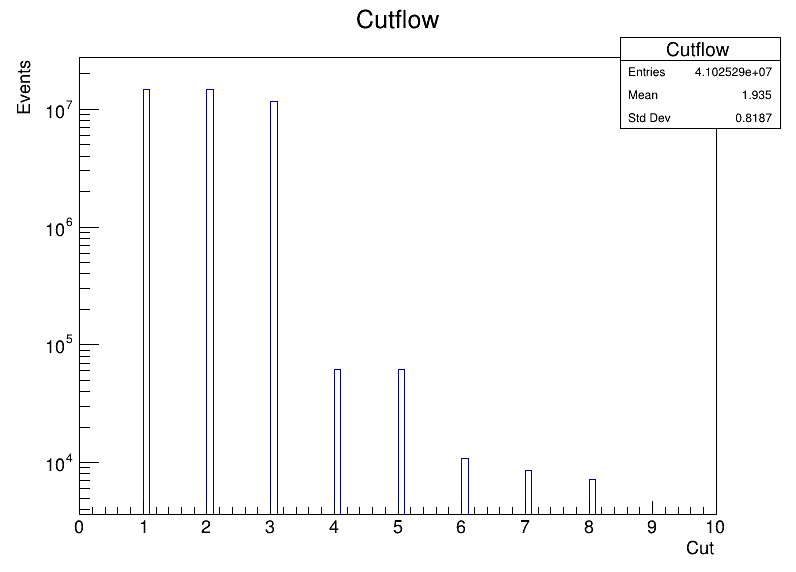

In [8]:
cutflow->Draw("");
canvas->SetLogy();
canvas->Draw();

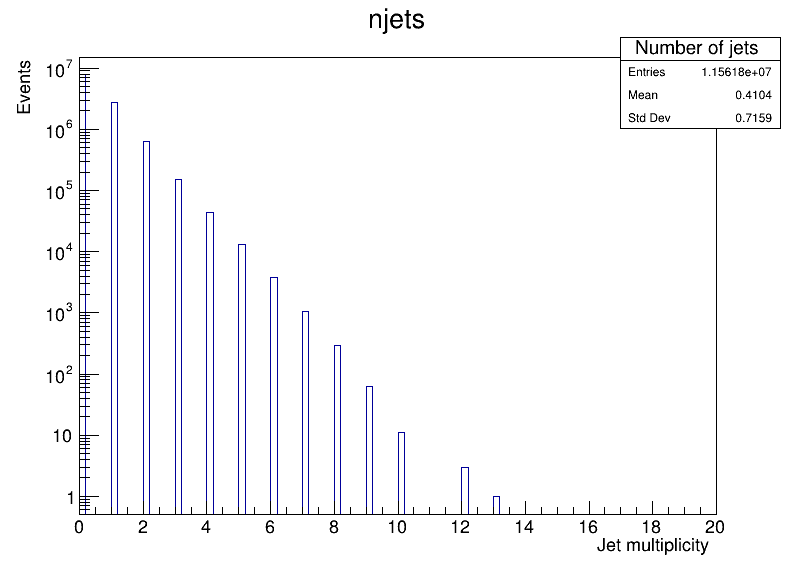

In [9]:
hist_njets->Draw("");
canvas->Draw();

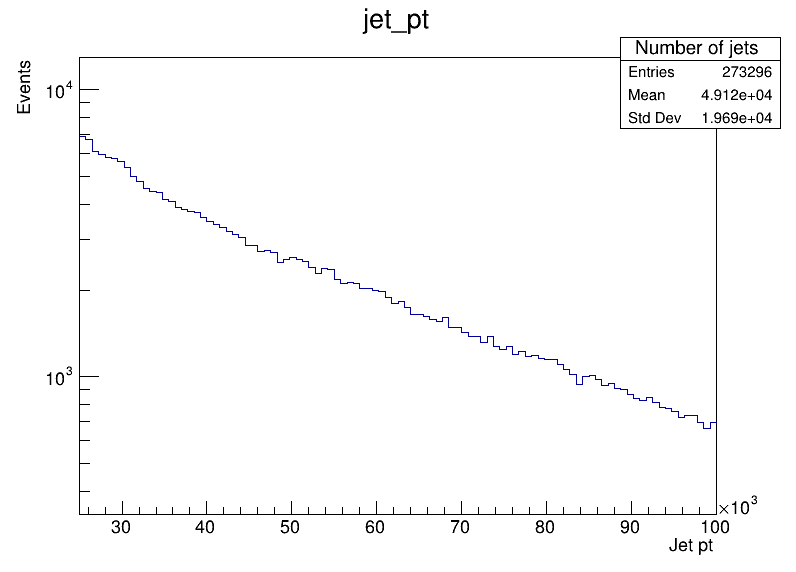

In [10]:
hist_jet_pt->Draw("");
canvas->Draw();

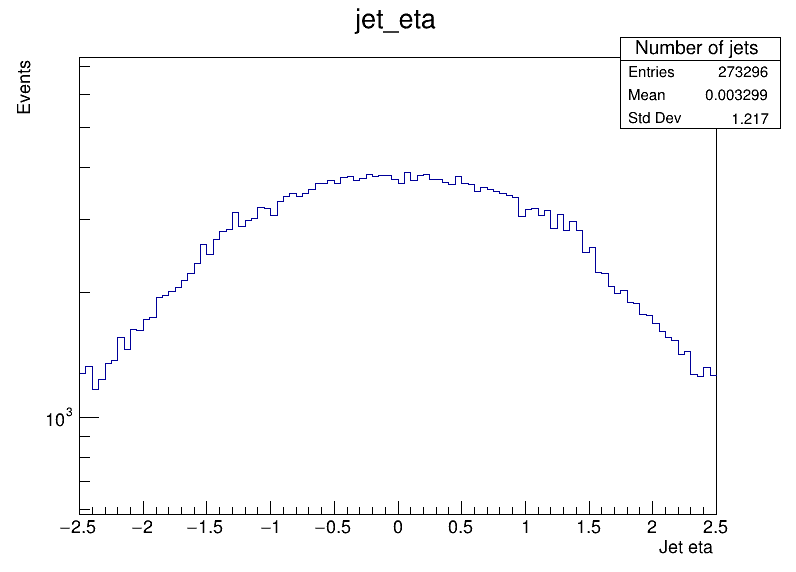

In [11]:
hist_jet_eta->Draw("");
canvas->Draw();

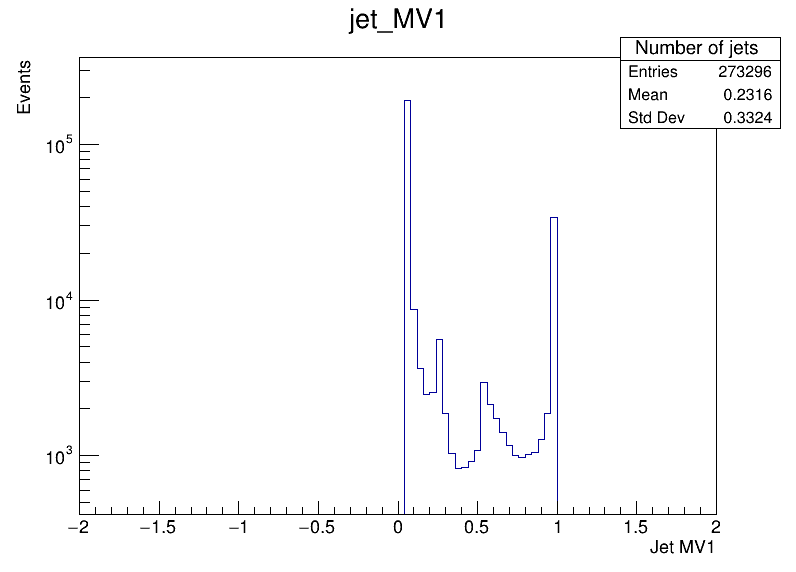

In [12]:
hist_jet_MV1->Draw("");
canvas->Draw();

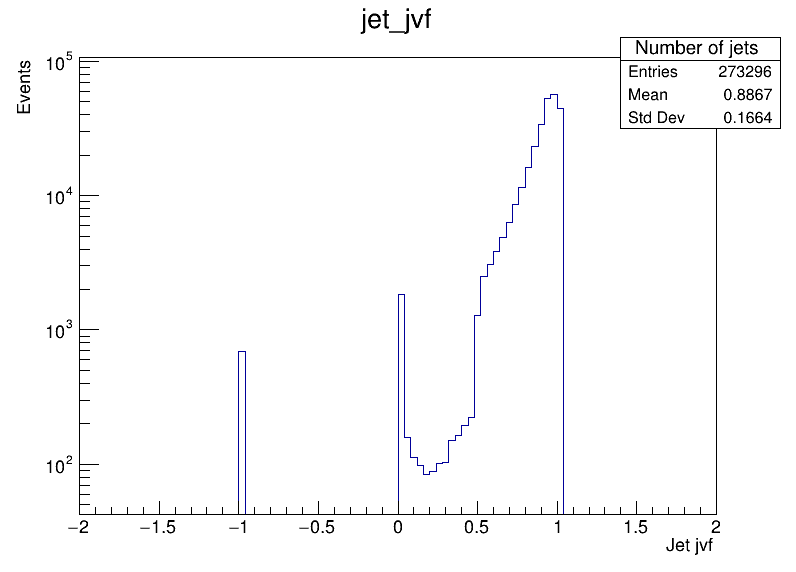

In [13]:
hist_jet_jvf->Draw("");
canvas->Draw();

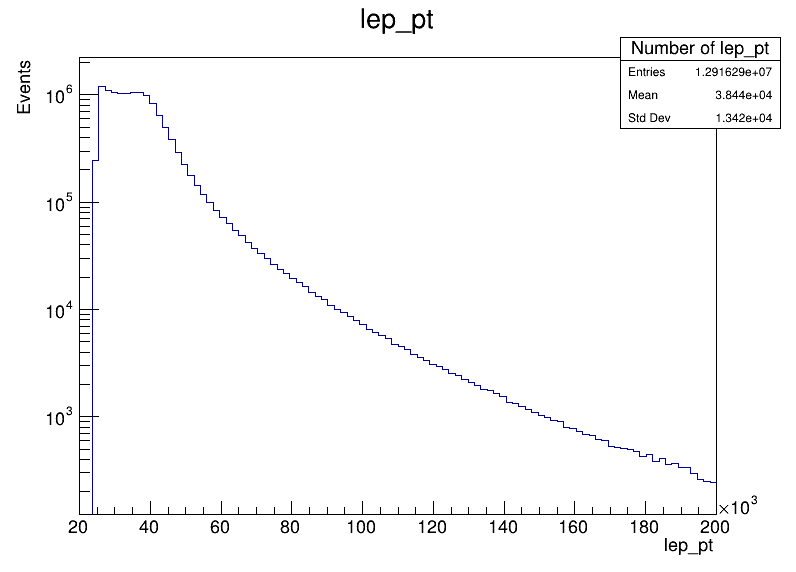

In [14]:
hist_lep_pt->Draw("");
canvas->Draw();

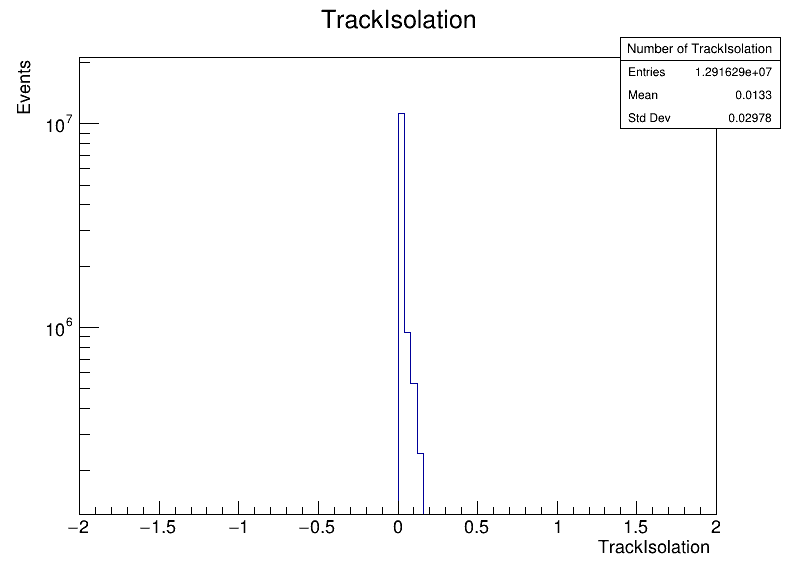

In [15]:
hist_TrackIsolation->Draw("");
canvas->Draw();

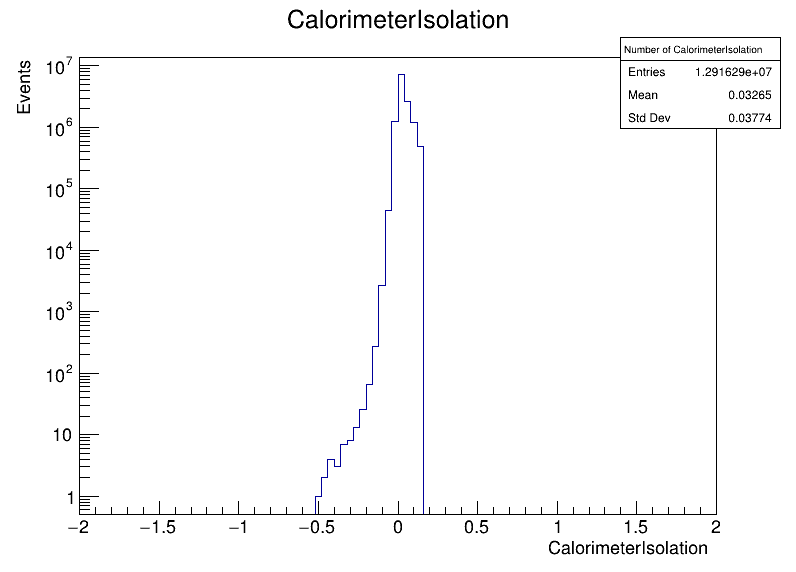

In [16]:
hist_CalorimeterIsolation->Draw("");
canvas->Draw();

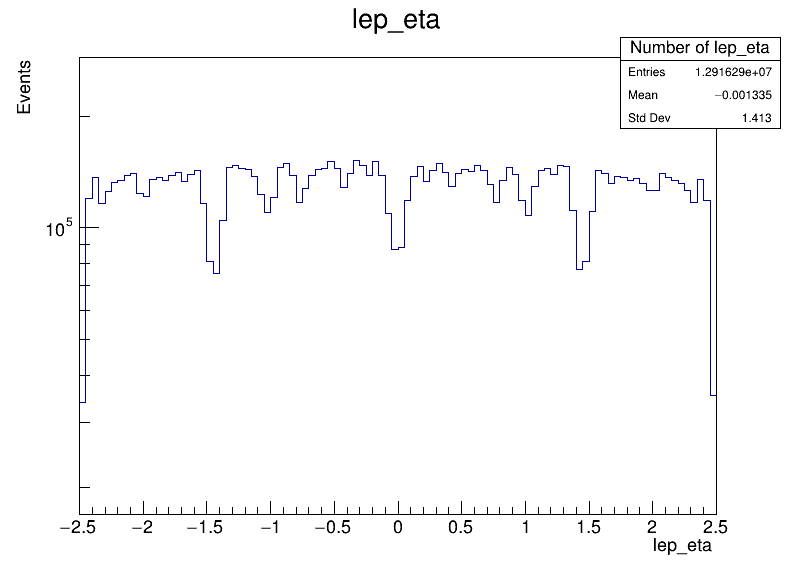

In [17]:
hist_lep_eta->Draw("");
canvas->Draw();

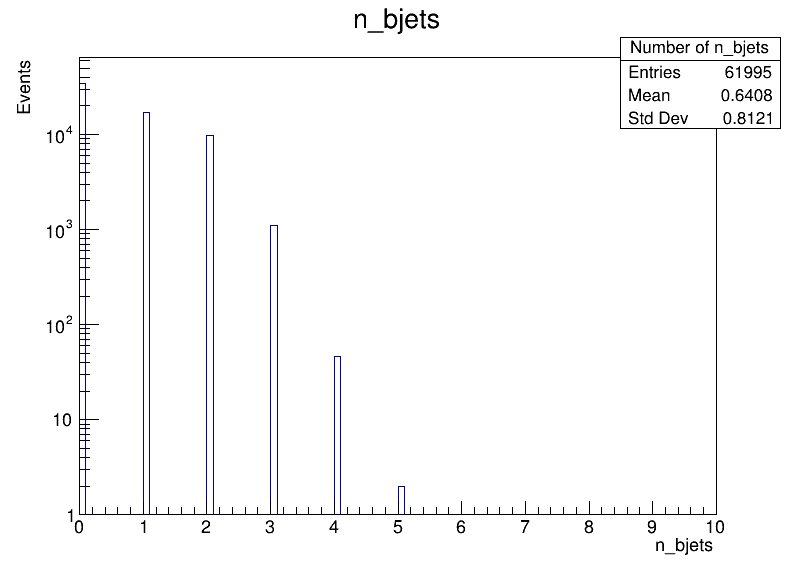

In [18]:
hist_n_bjets->Draw("");
canvas->Draw();

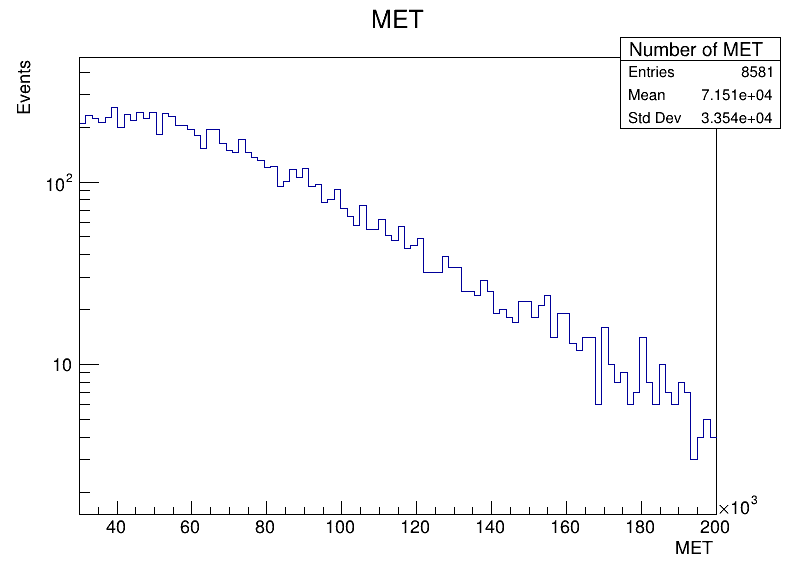

In [19]:
hist_MET->Draw("");
canvas->Draw();

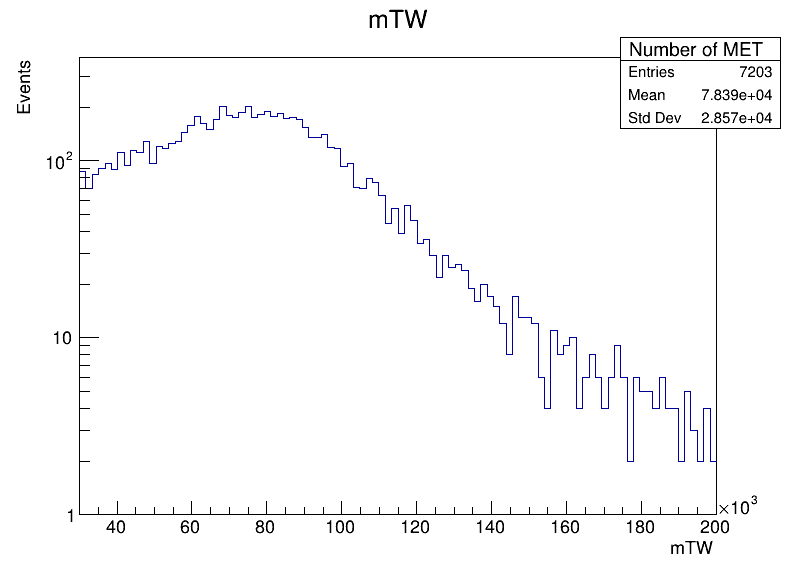

In [20]:
hist_mTW->Draw("");
canvas->Draw();